<a href="https://colab.research.google.com/github/YousefAbua/Intro-To-ML/blob/main/Homework3/Classifier_Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Import and read file
file_path = '/content/drive/My Drive/Intro to ML/Datasets/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path))

# Checking Null values
cancer.isnull().sum()*100/cancer.shape[0]

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

In [31]:
cancer.pop("id")
cancer.pop("Unnamed: 32")

# Applying binary map
cancer["diagnosis"] = cancer["diagnosis"].map({'M':1,'B':0})

y = cancer.pop("diagnosis")
x = cancer.values

pca = PCA(n_components=16)
pca_x = pca.fit_transform(x)

np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(pca_x, y, train_size = 0.8)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [32]:
model = GaussianNB()

model.fit(x_train, y_train)

pred = model.predict(x_test)

print(pred)

[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0
 1 1 0]


In [33]:
cnf_matrix = confusion_matrix(y_test, pred)
cnf_matrix

array([[58,  9],
       [ 5, 42]])

In [34]:
accuracy = metrics.accuracy_score(y_test, pred)
precision = metrics.precision_score(y_test, pred)
recall = metrics.recall_score(y_test, pred)
F1 = (2*precision*recall)/(precision+recall)
print('Accuracy = ', accuracy)
print('Precision = ', precision)
print('Recall = ', recall)
print('F1 Score = ', F1)

Accuracy =  0.8771929824561403
Precision =  0.8235294117647058
Recall =  0.8936170212765957
F1 Score =  0.8571428571428571


Text(0.5, 427.9555555555555, 'Predicted Label')

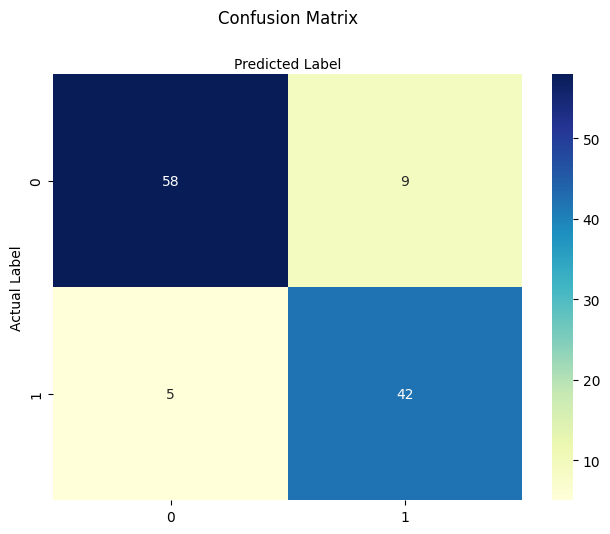

In [35]:
class_names = ['Benign','Malignant']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')